In [1]:
import sys
sys.path.append("/Users/satyaprk/Documents/intern_codes/robustness_vs_counterfactuals/")
sys.path.append("/Users/skrishna/Documents/phd_codes/neurips_paper/")
sys.path.append("/Users/satyaprk/Documents/intern_codes/robustness_vs_counterfactuals/Recourse_Methods/AR")
sys.path.append("/Users/satyaprk/Documents/intern_codes/robustness_vs_counterfactuals/Recourse_Methods/Generative_Model")


sys.path.append("/Users/satyaprk/Documents/intern_codes/robustness_vs_counterfactuals/Recourse_Methods/AR/recourse/")



In [2]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import torch.nn as nn
import pickle as pkl
from numpy import linalg as LA
import torch.nn as nn

import ML_Models.data_loader as loader
# from utils import _get_input_subset
# from Recourse_Methods.gradient_methods import SCFE
# from utils import get_recourses, get_performance_measures


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
## Dataset Prep


from torchvision import  datasets, transforms
from torch.utils.data import DataLoader

# data_name = "compas"
data_name = "adult"
# data_name = "german"
n_starting_instances = 1200
compas_dict = {
        "data_path": '../Data_Sets/COMPAS/',
        "filename_train": 'compas-train-upsampled.csv',
        "filename_test": 'compas-test-upsampled.csv',
        "label": "risk",
        "task": "classification",
        "lr": 1e-3,
        "d": 6,
        "H1": 10,
        "H2": 10,
        "activFun": nn.Softplus(),
        "n_starting_instances": n_starting_instances
    }

german_dict = {
        "data_path": '../Data_Sets/German_Credit_Data/',
        "filename_train": 'german-train.csv',
        "filename_test": 'german-test.csv',
        "label": "credit-risk",
        "task": "classification",
        "lr": 1e-3,
        "d": 6,
        "H1": 10,
        "H2": 10,
        "activFun": nn.Softplus(),
        "n_starting_instances": n_starting_instances
    
    }

adult_dict = {
        "data_path": "../Data_Sets/Adult/",
        "filename_train": 'adult-train-label.csv',
        "filename_test": 'adult-test-label.csv',
        "label": 'income',
        "task": "classification",
        "lr": 1e-3,
        "d": 6,
        "H1": 25,
        "H2": 25,
        "activFun": nn.Softplus(),
        "n_starting_instances": n_starting_instances
    }


data_meta_dictionaries = {
        "compas": compas_dict, 
        "adult": adult_dict, 
        "german":german_dict
    }
data_meta_info = data_meta_dictionaries[data_name]


dataset_test = loader.DataLoader_Tabular(path=data_meta_info["data_path"],
                                                 filename=data_meta_info["filename_test"],
                                                 label=data_meta_info["label"], scale = "standard")
        
dataset_train = loader.DataLoader_Tabular(path=data_meta_info["data_path"],
                                                  filename=data_meta_info["filename_train"],
                                                  label=data_meta_info["label"], scale = "standard")


column_names = pd.read_csv(data_meta_info["data_path"] + data_meta_info["filename_train"]).drop(data_meta_info["label"], axis=1).columns



In [4]:
# Data loader

train_loader = DataLoader(dataset_train, batch_size = 1, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size = 1, shuffle=False)

data = [i for i in train_loader]
num_input = len(data[0][0][0])



In [5]:
len(data)

36177

In [6]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.metrics import f1_score

# # do a single pass over the data
# def epoch(loader, model, opt=None):
#     total_loss, total_err = 0.,0.
#     for X,y, ind in loader:
#         yp = model(X.view(X.shape[0], -1).to(torch.float32))[:,0]
# #         y_class = torch.tensor((yp > 0)).to(torch.int32) # * (y==0) + (yp < 0) * (y==1)).sum().item()
# #         print("F1-Score : ", f1_score(y_class.numpy(), y.numpy()))
# #         print(yp)
#         loss = nn.BCEWithLogitsLoss()(yp, y.float())
#         if opt:
#             opt.zero_grad()
#             loss.backward()
#             opt.step()
        
#         total_err += ((yp > 0) * (y==0) + (yp < 0) * (y==1)).sum().item()
        
        
#         total_loss += loss.item() * X.shape[0]
#     return total_err / len(loader.dataset), total_loss / len(loader.dataset)

# model = nn.Linear(num_input, 1)
# opt = optim.SGD(model.parameters(), lr=1e-2)
# print("Train Err", "Train Loss", "Test Err", "Test Loss", sep="\t")
# test_errs = []
# for i in range(80):
#     train_err, train_loss = epoch(train_loader, model, opt)
#     test_err, test_loss = epoch(test_loader, model)
#     test_errs.append(test_err)
#     print(*("{:.6f}".format(i) for i in (train_err, train_loss, test_err, test_loss)), sep="\t")

    

In [7]:
# # torch.save(model, "./models/{}_lr_model.pth".format(data_name))

# # torch.save(model, "./models/{}_lr_model_minmax.pth".format(data_name))

# torch.save(model, "./models/{}_lr_model_standard.pth".format(data_name))




In [8]:
# plt.plot(range(len(test_errs)), test_errs)



In [9]:
# epsilon = 0.2
# delta = epsilon * model.weight.detach().sign()

# # Testing error on adversarial sample 
# def epoch_adv(loader, model, delta):
#     total_loss, total_err = 0.,0.
#     for X,y,ind in loader:
#         X = X.to(torch.float32)
# #         tmp = ((2*y.float()-1)[:, None]*delta.squeeze(0)).squeeze(0)
#         yp = model(X-((2*y.float()-1)[:, None]*delta.squeeze(0)).squeeze(0)).squeeze(-1)
# #         print(yp)
#         loss = nn.BCEWithLogitsLoss()(yp, y.float())
#         total_err += ((yp > 0) * (y==0) + (yp < 0) * (y==1)).sum().item()
#         total_loss += loss.item() * X.shape[0]
#     return total_err / len(loader.dataset), total_loss / len(loader.dataset)
# print(epoch_adv(test_loader, model, delta[None,None,:,:]))

In [10]:
def epoch_robust(loader, model, epsilon, opt=None):
    total_loss, total_err = 0.,0.
    for X,y,ind in loader:
        yp = model(X.view(X.shape[0], -1).to(torch.float32))[:,0] - epsilon*(2*y.float()-1)*model.weight.norm(1)
        loss = nn.BCEWithLogitsLoss()(yp, y.float())
        if opt:
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        total_err += ((yp > 0) * (y==0) + (yp < 0) * (y==1)).sum().item()
        total_loss += loss.item() * X.shape[0]
    return total_err / len(loader.dataset), total_loss / len(loader.dataset)


model_robust = nn.Linear(num_input, 1)
opt = optim.SGD(model_robust.parameters(), lr=1e-3)
epsilon = 0.2
print("Rob. Train Err", "Rob. Train Loss", "Rob. Test Err", "Rob. Test Loss", sep="\t")
for i in range(30):
    train_err, train_loss = epoch_robust(train_loader, model_robust, epsilon, opt)
    test_err, test_loss = epoch_robust(test_loader, model_robust, epsilon)
    print(*("{:.6f}".format(i) for i in (train_err, train_loss, test_err, test_loss)), sep="\t")    

Rob. Train Err	Rob. Train Loss	Rob. Test Err	Rob. Test Loss
0.247699	-5.093059	0.247872	-9.747534
0.247837	-14.344449	0.247872	-18.943506
0.247837	-23.540822	0.247872	-28.134511
0.247837	-32.737206	0.247872	-37.329573
0.247837	-41.933550	0.247872	-46.524549
0.247837	-51.129953	0.247872	-55.718192
0.247837	-60.326369	0.247872	-64.920906
0.247837	-69.560672	0.247872	-74.186455
0.247837	-78.827269	0.247872	-83.450666
0.247837	-88.093826	0.247872	-92.719605
0.247837	-97.360397	0.247872	-101.983912
0.247837	-106.626966	0.247872	-111.244282
0.247837	-115.893525	0.247872	-120.507120
0.247837	-125.160114	0.247872	-129.774572
0.247837	-134.426689	0.247872	-139.040946
0.247837	-143.693262	0.247872	-148.304322
0.247837	-152.959832	0.247872	-157.571709
0.247837	-162.226418	0.247872	-166.839221
0.247837	-171.492989	0.247872	-176.103994
0.247837	-180.759558	0.247872	-185.368686
0.247837	-190.026134	0.247872	-194.633931
0.247837	-199.292703	0.247872	-203.902196
0.247837	-208.559277	0.247872	-213.1649

KeyboardInterrupt: 

In [12]:
# model = torch.load("./models/{}_lr_model.pth".format(data_name))
# torch.save(model_robust, "./models/{}_lr_model.pth".format(data_name))
torch.save(model_robust, "./models/{}_lr_model_ro_standard.pth".format(data_name))


In [19]:
data_name

'adult'

In [116]:
# Recourse Method 2
import Recourse_Methods.Generative_Model.model as model_vae
from numpy import linalg as LA

# Second class of counter-factual explanation methods         
class CCHVAE:

    def __init__(self, classifier, model_vae, target_threshold: float = 0,
                 n_search_samples: int = 10000, p_norm: int = 1,
                 step: float = 0.05, max_iter: int = 1000, clamp: bool = True):
        
        super().__init__()
        self.classifier = classifier
        self.generative_model = model_vae
        self.n_search_samples = n_search_samples
        self.p_norm = p_norm
        self.step = step
        self.max_iter = max_iter
        self.clamp = clamp
        self.target_treshold = target_threshold

    def hyper_sphere_coordindates(self, instance, high, low):
    
        """
        :param n_search_samples: int > 0
        :param instance: numpy input point array
        :param high: float>= 0, h>l; upper bound
        :param low: float>= 0, l<h; lower bound
        :param p: float>= 1; norm
        :return: candidate counterfactuals & distances
        """
    
        delta_instance = np.random.randn(self.n_search_samples, instance.shape[1])
        dist = np.random.rand(self.n_search_samples) * (high - low) + low  # length range [l, h)
        norm_p = LA.norm(delta_instance, ord=self.p_norm, axis=1)
        d_norm = np.divide(dist, norm_p).reshape(-1, 1)  # rescale/normalize factor
        delta_instance = np.multiply(delta_instance, d_norm)
        candidate_counterfactuals = instance + delta_instance
    
        return candidate_counterfactuals, dist

    def generate_counterfactuals(self, query_instance: torch.tensor, target_class: int = 1) -> torch.tensor:
        """
        :param instance: np array
        :return: best CE
        """  #

        # init step size for growing the sphere
        low = 0
        high = low + self.step

        # counter
        count = 0
        counter_step = 1
        query_instance = query_instance.detach().numpy()

        # get predicted label of instance
        self.classifier.eval()
        instance_label = 1 - target_class
        # vectorize z
        z = self.generative_model.encode_csearch(torch.from_numpy(query_instance).float()).detach().numpy()
        z_rep = np.repeat(z.reshape(1, -1), self.n_search_samples, axis=0)
        y_cand = []
        while True:
            count = count + counter_step
            if count > self.max_iter:
                candidate_counterfactual_star = np.empty(query_instance.shape[0], )
                candidate_counterfactual_star[:] = np.nan
                distance_star = -1
                print('No CE found')
                break

            # STEP 1 -- SAMPLE POINTS on hypersphere around instance
            latent_neighbourhood, _ = CCHVAE.hyper_sphere_coordindates(self, z_rep, high, low)
            
#             print("-->> ", latent_neighbourhood)
            x_ce = self.generative_model.decode_csearch(torch.from_numpy(latent_neighbourhood).float()).detach().numpy()
            
            
            # why do we have this?
            if self.clamp:
                x_ce = x_ce.clip(-1, 1)

            # STEP 2 -- COMPUTE l1 & l2 norms
            if self.p_norm == 1:
                distances = np.abs((x_ce - query_instance)).sum(axis=1)
            elif self.p_norm == 2:
                distances = LA.norm(x_ce - query_instance, axis=1)
            else:
                print('Distance not defined yet')
            
            # counterfactual labels
#             print(self.classifier(torch.from_numpy(x_ce).float()).detach().numpy())
            y_cand.extend([int(i[0]) for i in self.classifier(torch.from_numpy(x_ce).float()).detach().numpy() > 0])
            y_candidate = torch.stack([torch.tensor([int(i[0])]) for i in self.classifier(torch.from_numpy(x_ce).float()).detach().numpy() > 0])
            
            print("Y_Cands : ", self.classifier(torch.from_numpy(x_ce).float()).detach().numpy().mean())
            indeces = np.where(y_candidate != instance_label)[0]
#             print("Indeces : ", indeces)
            candidate_counterfactuals = x_ce[indeces]
            candidate_dist = distances[indeces]
            
            if len(candidate_dist) == 0:  # no candidate found & push search range outside
                low = high
                high = low + self.step
            elif len(candidate_dist) > 0:  # certain candidates generated
                min_index = np.argmin(candidate_dist)
                candidate_counterfactual_star = candidate_counterfactuals[min_index]
                distance_star = np.abs(candidate_counterfactual_star - query_instance).sum()
                break

        return y_cand, torch.tensor(candidate_counterfactual_star), torch.tensor(distance_star)
#         return  torch.tensor(distance_star)     
    
    
    

In [117]:
def _get_input_subset(model_sub, inputs: torch.tensor,
                      subset_size: int = 100,
                      decision_threshold: float = 0) -> torch.tensor:
    
    """
    Get negatively classified inputs & return their predictions
    """
    
    yhat = (model_sub(inputs) > decision_threshold) * 1
    print(model_sub(inputs))
    check = (model_sub(inputs) < decision_threshold).detach().numpy()
    selected_indices = np.where(check)[0]
    input_subset = inputs[selected_indices]
    predicted_label_subset = yhat[selected_indices]
#     return input_subset, predicted_label_subset
    return input_subset[0:subset_size], predicted_label_subset[0:subset_size] #[0:subset_size] #[0:subset_size]

In [120]:
# Load the VAEs

vae_path = "../Recourse_Methods/Generative_Model/Saved_Models/"

input_size = dataset_train.get_number_of_features()

vae_model = model_vae.VAE_model(input_size,
                                data_meta_info['activFun'],
                                data_meta_info['d'],
                                data_meta_info['H1'],
                                data_meta_info['H2'])

data_meta_info["vae_path"] = vae_path + f"vae_{data_name}.pt"
print(data_meta_info["vae_path"])

vae_model.load_state_dict(torch.load(data_meta_info["vae_path"]))
        
testloader = DataLoader(dataset_test,
                        batch_size=data_meta_info["n_starting_instances"],
                        shuffle=True)
        
trainloader = DataLoader(dataset_train,
                         batch_size=data_meta_info["n_starting_instances"],
                         shuffle=True)


# This method makes the "Manifold assumption" and uses random search in latent space
cchvae = CCHVAE(classifier=model, model_vae=vae_model, step=0.3, max_iter=10000, target_threshold=0)
# cchvae_r = CCHVAE(classifier=model_robust, model_vae=vae_model, step=109.5, max_iter=10000, target_threshold=0)

# cchvae = CCHVAE(classifier=model, model_vae=vae_model, step=0.01, max_iter=10000, target_threshold=0)
# cchvae2 = CCHVAE(classifier=model_robust, model_vae=vae_model, step=0.01, max_iter=10000, target_threshold=0)

### Plot 1 : Box plot for baseline and robust models for distance, and validity. 

# inputs = torch.stack([j for i in test_loader for j in torch.unbind(i[0].to(torch.float32))][:200])






../Recourse_Methods/Generative_Model/Saved_Models/vae_adult.pt


In [121]:
cchvae_r = CCHVAE(classifier=model_robust, model_vae=vae_model, step=0.3, max_iter=20000, target_threshold=0)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
subset_size = 100
testloader = DataLoader(dataset_train,
                        batch_size=data_meta_info["n_starting_instances"],
                        shuffle=False)

data_iter = iter(testloader)
inputs, labels, indeces = data_iter.next()
inputs = inputs.to(device).float()
inputs, predicted_classes = _get_input_subset(model_robust, inputs, subset_size, decision_threshold=0)
print(inputs.shape)
print(inputs[0].reshape(1, -1))

distances_cchave_r = []
for i in range(len(inputs)):
    if i%10 == 0:
        print("Gotten {} done...".format(i))
    y_val, ctr_cfe, ctr_val,  = cchvae_r.generate_counterfactuals(
                    query_instance= inputs[i].reshape(1, -1),
                    target_class= 1 )
    if ctr_val.item() > 0:
        distances_cchave_r.append([ctr_cfe, ctr_val])
        
        

tensor([[-1.0631],
        [-2.4507],
        [-0.7821],
        ...,
        [-0.3868],
        [-0.7880],
        [-2.1831]], grad_fn=<AddmmBackward0>)
torch.Size([100, 13])
tensor([[ 0.7897,  0.7526,  2.2958, -0.1466,  5.3812,  0.7500, -1.4356, -1.6750,
          0.9366, -1.0983,  0.8382,  0.3998,  0.3088]])
Gotten 0 done...
Y_Cands :  -2.1444016
Y_Cands :  -2.145235
Y_Cands :  -2.1455328
Y_Cands :  -2.1461053
Y_Cands :  -2.1472898
Y_Cands :  -2.1504216
Y_Cands :  -2.1503375
Y_Cands :  -2.1536949
Y_Cands :  -2.152799
Y_Cands :  -2.15726
Y_Cands :  -2.1567788
Y_Cands :  -2.161974
Y_Cands :  -2.159619
Y_Cands :  -2.165894
Y_Cands :  -2.1663888
Y_Cands :  -2.1685853
Y_Cands :  -2.174935
Y_Cands :  -2.1741178
Y_Cands :  -2.1618536
Y_Cands :  -2.176322
Y_Cands :  -2.1706655
Y_Cands :  -2.1734283
Y_Cands :  -2.1675942
Y_Cands :  -2.1687102
Y_Cands :  -2.1662748
Y_Cands :  -2.1538432
Y_Cands :  -2.1596909
Y_Cands :  -2.1660423
Y_Cands :  -2.1691608
Y_Cands :  -2.1513116
Y_Cands :  -2.15396

Y_Cands :  -1.7025951
Y_Cands :  -1.6990068
Y_Cands :  -1.6928611
Y_Cands :  -1.68846
Y_Cands :  -1.6858149
Y_Cands :  -1.6779433
Y_Cands :  -1.6745328
Y_Cands :  -1.6622485
Y_Cands :  -1.6632193
Y_Cands :  -1.6539291
Y_Cands :  -1.6428932
Y_Cands :  -0.5076845
Y_Cands :  -0.50763553
Y_Cands :  -0.50777423
Y_Cands :  -0.50863993
Y_Cands :  -0.5096561
Y_Cands :  -2.2120495
Y_Cands :  -2.2113094
Y_Cands :  -2.210156
Y_Cands :  -2.2076657
Y_Cands :  -2.206572
Y_Cands :  -2.203031
Y_Cands :  -2.1982317
Y_Cands :  -2.1953573
Y_Cands :  -2.1887069
Y_Cands :  -2.1840599
Y_Cands :  -2.1793718
Y_Cands :  -2.173604
Y_Cands :  -2.1649392
Y_Cands :  -2.16265
Y_Cands :  -2.152752
Y_Cands :  -2.1434488
Y_Cands :  -2.1317565
Y_Cands :  -2.1256933
Y_Cands :  -2.124738
Y_Cands :  -2.1152189
Y_Cands :  -2.1093714
Y_Cands :  -2.1055753
Y_Cands :  -2.0920484
Y_Cands :  -2.0766542
Y_Cands :  -2.0722845
Y_Cands :  -2.0614927
Y_Cands :  -0.47960415
Y_Cands :  -0.47971836
Y_Cands :  -0.4816188
Y_Cands :  -0.4

KeyboardInterrupt: 

In [122]:
distances_cchave_r = [i[1] for i in distances_cchave_r]

In [123]:
distances_cchave_r

[tensor(32.4969),
 tensor(13.8385),
 tensor(10.1115),
 tensor(14.8488),
 tensor(8.8001),
 tensor(10.5585),
 tensor(10.5027),
 tensor(7.8435),
 tensor(13.2195),
 tensor(13.5619),
 tensor(20.0972),
 tensor(13.6845),
 tensor(13.9293),
 tensor(15.9555),
 tensor(10.2218),
 tensor(12.4249),
 tensor(22.3264),
 tensor(23.6987),
 tensor(16.8158),
 tensor(6.8903),
 tensor(12.7515),
 tensor(7.0986),
 tensor(11.9274),
 tensor(15.9932),
 tensor(10.7260),
 tensor(11.9604),
 tensor(8.8031),
 tensor(19.9793),
 tensor(6.8498),
 tensor(15.9265),
 tensor(12.1511),
 tensor(10.8402),
 tensor(7.7109),
 tensor(10.6405),
 tensor(6.2118),
 tensor(6.9191),
 tensor(18.4242),
 tensor(9.0910),
 tensor(16.6807),
 tensor(13.8430),
 tensor(19.3188),
 tensor(9.2865),
 tensor(14.9046),
 tensor(11.8983),
 tensor(13.2124)]

In [125]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
subset_size = 50
testloader = DataLoader(dataset_test,
                        batch_size=data_meta_info["n_starting_instances"],
                        shuffle=False)

data_iter = iter(testloader)
inputs, labels, indeces = data_iter.next()
inputs = inputs.to(device).float()
inputs, predicted_classes = _get_input_subset(model, inputs, subset_size, decision_threshold=0)
print(inputs.shape)
print(inputs[0].reshape(1, -1))

distances_cchave = []
for i in range(len(inputs)):
    if i%10 == 0:
        print("Gotten {} done...".format(i))
    y_pred, ctr_cfe, ctr_val,  = cchvae.generate_counterfactuals(
                    query_instance= inputs[i].reshape(1, -1),
                    target_class= 1 )
    if ctr_val.item() > 0:
        distances_cchave.append([ctr_cfe, ctr_val])
        
# distances_cchave = [cchvae.generate_counterfactuals(
#                     query_instance= inputs[i].reshape(1, -1),
#                     target_class= 1 ).item() for i in range(subset_size)]
# for i in range(subset_size):
#     print("Processing...", i)
#     vals = cchvae.generate_counterfactuals(
#                     query_instance= inputs[i].reshape(1, -1),
#                     target_class= 1 ).item()
#     print(vals)


# print(epoch_adv(test_loader, model, delta[None,None,:,:]))


tensor([[-4.1087],
        [-2.7158],
        [ 0.6641],
        ...,
        [-1.0674],
        [-2.6839],
        [ 0.1158]], grad_fn=<AddmmBackward0>)
torch.Size([50, 13])
tensor([[-0.8682,  0.0661, -0.4451, -0.1476, -0.2200, -1.7371,  0.6828,  0.6025,
          0.9271,  0.9114,  0.8393, -2.4053,  0.3074]])
Gotten 0 done...
Y_Cands :  -3.1854815
Y_Cands :  -3.1843367
Y_Cands :  -3.182227
Y_Cands :  -3.1810987
Y_Cands :  -3.1781323
Y_Cands :  -3.1699805
Y_Cands :  -3.1607845
Y_Cands :  -3.1582382
Y_Cands :  -3.1503074
Y_Cands :  -3.144538
Y_Cands :  -3.1361504
Y_Cands :  -3.1317282
Y_Cands :  -3.1238608
Y_Cands :  -3.1123052
Y_Cands :  -3.0975401
Y_Cands :  -3.0947022
Y_Cands :  -3.088026
Y_Cands :  -3.0849047
Y_Cands :  -3.0711641
Y_Cands :  -3.061759
Y_Cands :  -3.0547485
Y_Cands :  -3.242711
Y_Cands :  -3.2417116
Y_Cands :  -3.2407749
Y_Cands :  -3.2328448
Y_Cands :  -3.230399
Y_Cands :  -3.226644
Y_Cands :  -3.2209558
Y_Cands :  -3.2190988
Y_Cands :  -3.204019
Y_Cands :  -3.20042

KeyboardInterrupt: 

In [126]:
distances_cchave = [i[1] for i in distances_cchave]

In [127]:
sum(distances_cchave)/len(distances_cchave)

tensor(16.0542)

In [55]:
cfe_base = [i[0] for i in distances_cchave]
cfe_base = [i[0] for i in distances_cchave_r]
distances_cchave = [i[1] for i in distances_cchave]
distances_cchave_r = [i[1] for i in distances_cchave_r]



In [82]:
import pickle as pkl
pkl.dump(distances_cchave_r, open("ro_cchvae_minmax_{}_.pkl".format(data_name), "wb"))
pkl.dump(distances_cchave, open("base_cchvae_minmax_{}_.pkl".format(data_name), "wb"))

sum(distances_cchave_r)/len(distances_cchave_r)


tensor(14.3080)

In [91]:
model_name = ["base"]*len(distances_cchave) + ["robust"]*len(distances_cchave_r) # + len(distance_scfe))
cost_vals = [i for i in distances_cchave] + [i for i in distances_cchave_r]

cchvae_data_df = pd.DataFrame(list(zip(cost_vals, model_name)), columns=["Cost", "Model"])
cchvae_data_df.to_csv("{}_cchvae_data_df.csv".format(data_name))



In [92]:
# cchvae_data_df = pd.read_csv("adult_cchvae.csv")
# del cchvae_data_df["Unnamed: 0"]

In [97]:
# Recourse Method -1 
import torch
import numpy as np
from torch import nn
import datetime


class SCFE:
    
    def __init__(self, classifier, target_threshold: float = 0, _lambda: float = 10.0,
                 lr: float = 0.1, max_iter: int = 500, t_max_min: float = 0.5,
                 step: float = 0.10, norm: int = 1, optimizer: str = 'adam'):
        
        super().__init__()
        self.model_classification = classifier
        self.lr = lr
        self.max_iter = max_iter
        self.optimizer = optimizer
        self.t_max_min = t_max_min
        self.norm = norm
        self.sigmoid = nn.Sigmoid()
        self.target_thres = target_threshold
        self._lambda = _lambda
        self.step = step
    
    def generate_counterfactuals(self, query_instance: torch.tensor, target_class: int = 1) -> torch.tensor:
        """
            query instance: the point to be explained
            target_class: Direction of the desired change. If target_class = 1, we aim to improve the score,
                if target_class = 0, we aim to decrese it (in classification and regression problems).
            _lambda: Lambda parameter (distance regularization) parameter of the problem
        """
        
        if target_class == 1:
            target_prediction = torch.tensor(1).float()
        else:
            target_prediction = torch.tensor(0).float()
        
        output = self._call_model(query_instance.reshape(1, -1))
        output = self._call_model(query_instance)
        
        cf = query_instance.clone().requires_grad_(True)
        
        if self.optimizer == 'adam':
            optim = torch.optim.Adam([cf], self.lr)
        else:
            optim = torch.optim.RMSprop([cf], self.lr)
        
        # Timer
        t0 = datetime.datetime.now()
        t_max = datetime.timedelta(minutes=self.t_max_min)
        
        counterfactuals = []
        while not self._check_cf_valid(output, target_class):
#             print("in...")
            iter = 0
            distances = []
            all_loss = []
            while not self._check_cf_valid(output, target_class) and iter < self.max_iter:
                cf.requires_grad = True
                total_loss, loss_distance = self.compute_loss(self._lambda, cf,
                                                              query_instance,
                                                              target_prediction)
                optim.zero_grad()
                total_loss.backward(retain_graph=True)
                optim.step()
                
                output = self._call_model(cf)
                
                if self._check_cf_valid(output, target_class):
                    counterfactuals.append(cf.detach())
                    distances.append(loss_distance.clone().detach())
                    all_loss.append(total_loss.detach())
                
                iter = iter + 1
            
            output = self._call_model(cf).reshape(1, -1).detach()
            if datetime.datetime.now() - t0 > t_max:
                break

            if self.step == 0.0:  # Don't search over lambdas
                break
            else:
                self._lambda -= self.step

        if not len(counterfactuals):
            print('No CE found')
            cf.detach_()
            return torch.tensor(-1.0)
        
        # Choose the nearest counterfactual
        counterfactuals = torch.stack(counterfactuals)
        distances = torch.stack(distances)
        distances = distances.detach()
        index = torch.argmin(distances)
        counterfactuals = counterfactuals.detach()

        ce_star = counterfactuals[index]
        distance_star = distances[index]
        
        
#         return ce_star, distance_star
        return distance_star

    
    def compute_loss(self, _lambda: float, cf_candidate: torch.tensor, original_instance: torch.tensor,
                     target: torch.tensor) -> torch.tensor:
        output = self._call_model(cf_candidate)
        # classification loss
        bce_loss = nn.BCEWithLogitsLoss()
#         print("Testing code : " , output, target)
        loss_classification = bce_loss(output, target)
        # distance loss
        loss_distance = torch.norm((cf_candidate - original_instance), self.norm)
        # full loss
        total_loss = loss_classification + _lambda * loss_distance
        return total_loss, loss_distance

    def _call_model(self, cf_candidate):
        output = self.model_classification(cf_candidate)[0]
#         print(output)
        return output

    def _check_cf_valid(self, output, target_class):
        """ Check if the output constitutes a sufficient CF-example.
            target_class = 1 in general means that we aim to improve the score,
            whereas for target_class = 0 we aim to decrese it.
        """
        if target_class == 1:
            check = output >= self.target_thres
            return check
        else:
            check = output <= self.target_thres
            return check
        

In [95]:
scfe = SCFE(classifier=model, lr=1e-3, _lambda=0.00, step=0.00, max_iter=10000, target_threshold=0)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
subset_size = 200
testloader = DataLoader(dataset_test,
                        batch_size=data_meta_info["n_starting_instances"],
                        shuffle=False)

data_iter = iter(testloader)
inputs, labels, indeces = data_iter.next()
inputs = inputs.to(device).float()
inputs, predicted_classes = _get_input_subset(model, inputs, subset_size, decision_threshold=0)

cost_scfe = []
for i in range(len(inputs)):
    if i%100 == 0:
        print("Gotten {} done...".format(i))
    val_scfe = scfe.generate_counterfactuals(
                    query_instance=inputs[i],
                    target_class=1)
    if val_scfe.item() > 0:
        cost_scfe.append(val_scfe)
        

tensor([[-6.9910],
        [-0.8539],
        [-1.9934],
        ...,
        [-2.2990],
        [-2.7796],
        [ 0.8908]], grad_fn=<AddmmBackward0>)
Gotten 0 done...
Gotten 100 done...
Gotten 200 done...
Gotten 300 done...
Gotten 400 done...
Gotten 500 done...
Gotten 600 done...
Gotten 700 done...
Gotten 800 done...
Gotten 900 done...


In [100]:
scfe_r = SCFE(classifier=model_robust, lr=1e-3, _lambda=0.00, step=0.00, max_iter=10000, target_threshold=0)

testloader = DataLoader(dataset_test,
                        batch_size=data_meta_info["n_starting_instances"],
                        shuffle=False)

data_iter = iter(testloader)
inputs, labels, indeces = data_iter.next()
inputs = inputs.to(device).float()
inputs, predicted_classes = _get_input_subset(model_robust, inputs, subset_size, decision_threshold=0)

cost_scfe_r = []
for i in range(len(inputs)):
    if i%100 == 0:
        print("Gotten {} done...".format(i))
    val_scfe = scfe_r.generate_counterfactuals(
                    query_instance=inputs[i],
                    target_class=1)
    if val_scfe.item() > 0:
        cost_scfe_r.append(val_scfe)

tensor([[-4.3380],
        [-0.5300],
        [-1.8543],
        ...,
        [-1.6476],
        [-0.9036],
        [-0.4300]], grad_fn=<AddmmBackward0>)
Gotten 0 done...
Gotten 100 done...
Gotten 200 done...
Gotten 300 done...
Gotten 400 done...
Gotten 500 done...
Gotten 600 done...
Gotten 700 done...
Gotten 800 done...
Gotten 900 done...
Gotten 1000 done...


In [101]:
model_name = ["base"]*len(cost_scfe) + ["robust"]*len(cost_scfe_r) # + len(distance_scfe))
cost_vals = [i for i in cost_scfe] + [i for i in cost_scfe_r]

scfe_data_df = pd.DataFrame(list(zip(cost_vals, model_name)), columns=["Cost", "Model"])
scfe_data_df.to_csv("{}_scfe_data_df.csv".format(data_name))


# scfe_data_df = pd.read_csv("{}_scfe_data_df.csv".format(data_name), index_col=False)



In [102]:
vals_base_scfe = scfe_data_df[scfe_data_df["Model"] == "base"]["Cost"].values
vals_base_cchvae = cchvae_data_df[cchvae_data_df["Model"] == "base"]["Cost"].values

method_names = ["scfe"]*len(vals_base_scfe) + ["cchvae"]*len(vals_base_cchvae)
cost_values_base = list(vals_base_scfe) + list(vals_base_cchvae)



In [103]:
pd.DataFrame(list(zip(cost_values_base, method_names)), columns=["Cost", "Method"]).to_csv("base_cost_{}.csv".format(data_name))




In [104]:

vals_robust_scfe = scfe_data_df[scfe_data_df["Model"] == "robust"]["Cost"].values
vals_robust_cchvae = cchvae_data_df[cchvae_data_df["Model"] == "robust"]["Cost"].values

method_names = ["scfe"]*len(vals_robust_scfe) + ["cchvae"]*len(vals_robust_cchvae)
cost_values_robust = list(vals_robust_scfe) + list(vals_robust_cchvae)


pd.DataFrame(list(zip(cost_values_robust, method_names)), columns=["Cost", "Method"]).to_csv("robust_cost_{}.csv".format(data_name))



In [105]:
import os
import ipdb
import glob
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

processing .. scfe
processing .. cchvae
skyblue
processing .. scfe
processing .. cchvae
orange


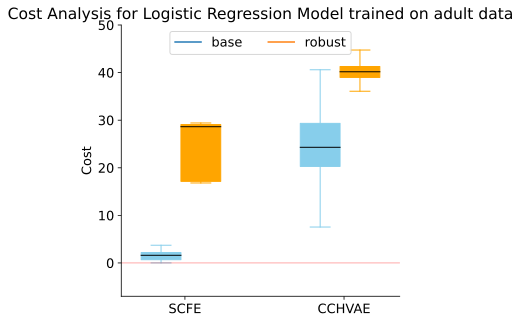

In [106]:
plt.rcParams.update({'font.size': 13})  # , 'font.weight': 'bold'})
# plt.rc('font', family='sans-serif')
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color='black')
# plt.rc('font', family='sans-serif')


# inits
algos = ['scfe', 'cchvae'] # 'itg', 'sg005', 'shap', 'lime005', 'control'] #, 'pgmex', 'pgex']  # , 'gnnex', 'pgmex', 'pgex']

datasets =   ["adult"] #, "compas"]
bernoullis = ["0.03"] #, "0.1"]
variances =  ["0.05"] #, "0.1"]
model_name = "ann" #need change for different models

stability_notions = ["base", "robust"] #["stability2_diff_input", "stability2_diff_representation", "stability2_diff_output"]

for data_name in datasets:
    plt.figure(figsize=(5, 5))
    plot_names = ["base", "robust"]
    plot_cols = ["skyblue", "orange"] #, "orange"]
    plots = []
    tick_val= -0.3
    for stab_ind,stability_notion in enumerate(stability_notions):
#         df = None
        df = pd.read_csv(stability_notion + "_cost_{}.csv".format(data_name))

        df_sep = []

        for i, val in enumerate(algos):
            print("processing ..", val)
            df_sep.append(df[df["Method"] == val]["Cost"].to_numpy())

        
#         ## print statistics
#         for i, val in enumerate(df_sep):
#             print(f'Explanation method: {algos[i]}, Mean_1={np.mean(val):.3f}, median={np.median(df_sep[i]):.3f}')

        
        val = plt.boxplot(df_sep, positions=np.array(range(len(df_sep)))*2.0+tick_val, sym='', widths=0.5, patch_artist=True) 
        tick_val+=0.5
        plt.plot([], label=plot_names[stab_ind])
        print(plot_cols[stab_ind])
        set_box_color(val, plot_cols[stab_ind])
        
        
    #plt.legend(loc="center bottom")
    plt.legend(loc='upper center', ncol=2)
    plt.xticks(np.array(range(len(df_sep)))*2.0, ['SCFE', 'CCHVAE'])
    plt.ylim(-7, 50)
    plt.axhline(y=0, color='red', linewidth= 0.3)
    plt.ylabel("Cost")
    plt.title("Cost Analysis for Logistic Regression Model trained on {} data".format(data_name))
    plt.savefig(data_name+"_"+model_name+"_cost.pdf",  bbox_inches='tight')
    
        
        

In [92]:

testloader = DataLoader(dataset_test,
                        batch_size=data_meta_info["n_starting_instances"],
                        shuffle=False)

data_iter = iter(testloader)
inputs, labels, indeces = data_iter.next()
inputs = inputs.to(device).float()
inputs, predicted_classes = _get_input_subset(model_robust, inputs, subset_size, decision_threshold=0)
print(inputs.shape)
print(inputs[0].reshape(1, -1))
distances_cchave_r = [cchvae.generate_counterfactuals(
                    query_instance= inputs[i].reshape(1, -1),
                    target_class= 1 ).item() for i in range(subset_size)]

print(epoch_adv(test_loader, model, delta[None,None,:,:]))

torch.Size([1200, 13])
tensor([[0.1370, 0.1511, 0.5333, 0.0000, 0.0000, 0.1939, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 0.0000, 1.0000]])


KeyboardInterrupt: 

In [ ]:
distances_cchave_r

In [ ]:
sum(distances_cchave)/len(distances_cchave)